# **Maestría en Inteligencia Artificial Aplicada**

## Curso: **Procesamiento de Lenguaje Natural**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Adtividad Semana 5

### **Vectores Embebidos de OpenAI**

#### **Nombres y matrículas de los integrantes del equipo:**



*   Elemento de lista
*   Carlos Pano Hernandez - A01066264



In [246]:
# Aquí deberás incluir todas las librerías que requieras durante esta actividad:

# Data manipulation and analysis
import pandas as pd
import numpy as np
from collections import Counter

# NLP processing
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import string

# OpenAI integration
from openai import OpenAI
import openai
from dotenv import load_dotenv
import os

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    roc_auc_score
)

# Utilities
import pickle
from tqdm import tqdm
from tenacity import (
    retry,
    wait_random_exponential,
    stop_after_attempt
)

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Commented out unused imports
"""
import spacy
import en_core_web_lg
from scipy.spatial import distance
import fasttext
import fasttext.util
"""


'\nimport spacy\nimport en_core_web_lg\nfrom scipy.spatial import distance\nimport fasttext\nimport fasttext.util\n'

In [247]:
# Descargamos los paquetes necesarios
nltk.download('punkt')   
nltk.download('stopwords')
negwords = [ 'no', 'nor', 'not', 'ain', 'aren', "aren't", 'don', "don't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

mystopwords = set(stopwords.words('english')) - set(negwords)
print("\nStop words excluding negation words:")
print("-" * 40)
print(sorted(mystopwords))
print("-" * 40)


Stop words excluding negation words:
----------------------------------------
['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'd', 'did', 'do', 'does', 'doing', 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'has', 'have', 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', 'it', "it'd", "it'll", "it's", 'its', 'itself', 'just', 'll', 'm', 'ma', 'me', 'more', 'most', 'my', 'myself', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'she', "she'd", "she'll", "she's", 'should', "should've", 'so', 'some', 'such', 't', 'than', 'that', "that'll", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', 'these', 'they', "the

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/charliepano/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/charliepano/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [248]:
# Download the English fasttext model
#fasttext.util.download_model('en', if_exists='ignore')  # English
#fasttext.util.download_model('es', if_exists='ignore')  # Español
#cc_en = fasttext.load_model('cc.en.300.bin')


In [249]:
# Incluye las celdas necesarias para tu acceso a la API de OpenAI.

# Load environment variables from the specific .env file -> Amigos, aqui cada quien configuere su propia API key en el .env
# El .gitignore ya excluye el mismo.

load_dotenv('.env')

api_key = os.getenv('OPENAI_API_KEY')
if api_key is None:
    raise ValueError("OPENAI_API_KEY environment variable is not set")

client = OpenAI(api_key=api_key)

# Prueba de la API de OpenAI
response = client.responses.create(
    model="gpt-4o-mini",
    input="Hola, como estas? (Responde en 1 palabra y en Aleman)"
)

print(response.output_text)


Gut.


# **Pregunta - 1:**



Descarga los 3 archivos de Canvas y genera un nuevo DataFrame de Pandas con ellos.

**Llama simplemente "df" a dicho DataFrame.**

Los archivos los encuentras en Canvas: amazon5.txt, imdb5.txt, yelp5.txt.



In [250]:
# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

# Archivos
files = ["data/amazon5.txt", "data/imdb5.txt", "data/yelp5.txt"]

# Lista donde guardar todas las líneas
all_lines = []

for file in files:
    with open(file, 'r', encoding='utf-8') as f:
        lines = [line.strip() for line in f if line.strip()]
        all_lines.extend(lines)

# creacion del Dataframe
df = pd.DataFrame({'text': all_lines})

# *********** Aquí termina la sección de agregar código *************


In [251]:
# Verifiquemos la información del DataFrame:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3000 non-null   object
dtypes: object(1)
memory usage: 23.6+ KB


In [252]:
# Y veamos sus primeros registros:

print(df.head())

                                                text
0  So there is no way for me to plug it in here i...
1                     Good case, Excellent value.\t1
2                          Great for the jawbone.\t1
3  Tied to charger for conversations lasting more...
4                               The mic is great.\t1


# **Pregunta - 2:**

Realiza el proceso de limpieza. Aplica el preprocesamiento que consideres adecuado.











In [253]:
# Limpiamos el texto reemplazando los tabuladores por espacios y separamos la etiqueta del comentario.
# Como los datos de IMDB no usan tabulador para separar la etiqueta, usamos rsplit para dividir desde el final.
# Esto permite extraer correctamente la etiqueta (Y) como la última palabra del texto.
df['text'] = df['text'].str.replace('\t', ' ', regex=False)
df[['text', 'Y']] = df['text'].str.rsplit(n=1, expand=True)
df['Y'] = df['Y'].astype(int)
Y = df['Y'].copy()
X = df['text']

In [254]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3000 non-null   object
 1   Y       3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [255]:
# Text preprocessing functions

def clean_tok(doc):
    # Basic cleaning and tokenization
    doc = doc.lower()
    
    # Remove non-letters
    doc = re.sub(r'[^a-z\s]', ' ', doc)
    
    # Split into words
    tokens = doc.split()
    
    # Filter stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [token for token in tokens if token not in stop_words]
    
    # Remove single chars
    tokens = [token for token in tokens if len(token) > 1]

    return tokens


def clean_doc(doc):
    # Token normalization
    ps = PorterStemmer()
    wnl = WordNetLemmatizer()
    
    tokens = []
    
    for token in doc:
        # Clean repeating chars
        token = re.sub(r'(.)\1{2,}', r'\1\1', token)
        token = ps.stem(token)
        token = wnl.lemmatize(token)
        tokens.append(token)
        
    return tokens

# Clean and tokenize
Xclean = [clean_tok(x) for x in X]   
print("Tokens after cleaning:")
print(*Xclean[0:5], sep='\n')

# Normalize tokens
Xclean = [clean_doc(x) for x in Xclean]  
print("\nTokens after normalization:")
print(*Xclean[0:5], sep='\n')

Tokens after cleaning:
['way', 'plug', 'us', 'unless', 'go', 'converter']
['good', 'case', 'excellent', 'value']
['great', 'jawbone']
['tied', 'charger', 'conversations', 'lasting', 'minutes', 'major', 'problems']
['mic', 'great']

Tokens after normalization:
['way', 'plug', 'u', 'unless', 'go', 'convert']
['good', 'case', 'excel', 'valu']
['great', 'jawbon']
['tie', 'charger', 'convers', 'last', 'minut', 'major', 'problem']
['mic', 'great']


In [256]:
# Despleguemos los primeros comentarios después de tu proceso de limpieza:

for x in Xclean[0:5]:
  print(x)

['way', 'plug', 'u', 'unless', 'go', 'convert']
['good', 'case', 'excel', 'valu']
['great', 'jawbon']
['tie', 'charger', 'convers', 'last', 'minut', 'major', 'problem']
['mic', 'great']


# **Pregunta - 3:**



Realicemos una partición aleatoria con los mismos porcentajes de la práctica pasada para poder comparar dichos resultados con los de
esta actividad, a saber, 70%, 15% y 15%, para entrenamiento, validación y prueba, respectivamente.

In [257]:

# ************* Inicia la sección de agregar código:*****************************

x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(Xclean, Y, train_size=.70, shuffle=True, random_state=1) 
x_val, x_test, y_val, y_test = train_test_split(x_val_and_test, y_val_and_test, test_size=.50, shuffle=True, random_state=17)


# *********** Termina la sección de agregar código *************


# verificemos las dimensiones obtenidas:
print('X,y Train:', len(x_train), len(y_train))
print('X,y Val:', len(x_val), len(y_val))
print('X,y Test', len(x_test), len(y_test))

X,y Train: 2100 2100
X,y Val: 450 450
X,y Test 450 450


# **Pregunta - 4:**



Construye tu vocabulario a continuación


In [258]:
# a.	Usa el conjunto de entrenamiento para generar tu vocabulario
#     con un tamaño que consideres adecuado:


# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********


midiccionario = Counter()    

for k in range(len(x_train)):
  midiccionario.update(x_train[k])


# *********** Aquí termina la sección de agregar código *************

In [259]:
# b.	Indica el tamaño del vocabulario generado.

# ******* Inicia la sección de agregar código: ***********


print('Longitud del diccionario:', len(midiccionario))  
print('\n(word,frequency):') 
print(midiccionario.most_common(10)) 


# *********** Aquí termina la sección de agregar código *************

Longitud del diccionario: 3145

(word,frequency):
[('good', 164), ('movi', 140), ('great', 139), ('phone', 134), ('film', 130), ('work', 113), ('time', 102), ('like', 101), ('one', 100), ('place', 87)]


c.	¿Por qué debe usarse solamente el conjunto de entrenamiento para generar el vocabulario?


### ++++++++ Inicia la sección de agregar texto: +++++++++++

Existen varias razones, entre las principales se encuentran:

1. **Evitar data leakage:** Si usáramos otros conjuntos para nuestro diccionario, estaríamos filtrando información que debería ser completamente desconocida durante el entrenamiento.
2. **Simular escenarios reales:** En un caso real, no tendremos acceso a datos futuros.
3. **Detectar overfitting:** Si el vocabulario se construyera con todos los datos, sería más difícil detectar si el modelo está memorizando en lugar de aprendiendo patrones generalizables.

### ++++++++ Termina la sección de agregar texto: +++++++++++


In [260]:
# d.	Con el vocabulario generado, filtra los conjuntos de entrenamiento,
#     validación y prueba para que todos los comentarios usen solamente las
#     palabras de este vocabulario.

#     Llamar train_x, val_x y test_x a estos tres conjuntos.


# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

# Crear conjuntos filtrados usando solo palabras del vocabulario
train_x = []
val_x = []
test_x = []

# Filtrar conjunto de entrenamiento
for comment in x_train:
    filtered_comment = [word for word in comment if word in midiccionario]
    train_x.append(filtered_comment)

# Filtrar conjunto de validación  
for comment in x_val:
    filtered_comment = [word for word in comment if word in midiccionario]
    val_x.append(filtered_comment)

# Filtrar conjunto de prueba
for comment in x_test:
    filtered_comment = [word for word in comment if word in midiccionario]
    test_x.append(filtered_comment)

# *********** Aquí termina la sección de agregar código *************


In [261]:
# Vemos el resultado de los primeros comentarios del conjunto de entrenamiento:

for ss in train_x[0:5]:
  print(ss)

['co', 'star', 'fare', 'much', 'better', 'peopl', 'like', 'morgan', 'freeman', 'jonah', 'hill', 'ed', 'helm', 'wast']
['tonight', 'elk', 'filet', 'special', 'suck']
['paid', 'bill', 'tip', 'felt', 'server', 'terribl', 'job']
['call', 'steakhous', 'properli', 'cook', 'steak', 'understand']
['howev', 'keypad', 'tinni', 'sometim', 'reach', 'wrong', 'button']


# **Pregunta - 5:**


#### **Incluye aquí un resumen de las características y diferencias que tiene al menos los tres modelos de OpenAI indicados: "text-embedding-3-small", "text-embedding-3-large" y "text-embedding-ada-002".**

### ++++++++ Inicia la sección de agregar texto: +++++++++++

## text-embedding-3-small

- **Dimensiones:** 1,536 por defecto (configurable hasta 512)
- **Rendimiento:** Superior a ada-002 en tareas de embeddings
- **Costo:** Más económico que el modelo large
- **Usos recomendados:**
  - Búsqueda semántica rápida
  - Clasificación de textos en tiempo real
  - Sistemas de recomendación ligeros
- **Ideal para:** Aplicaciones que requieren buen balance entre rendimiento y costo
- **Lanzamiento:** Enero 2024

## text-embedding-3-large

- **Dimensiones:** 3,072 por defecto (configurable)
- **Rendimiento:** El más potente, con mejor precisión en tareas complejas
- **Costo:** El más elevado de los tres modelos
- **Usos recomendados:**
  - Análisis de sentimientos y emociones sutiles
  - Clasificación de textos con múltiples etiquetas
  - Comparación semántica profunda entre documentos
- **Ideal para:** Aplicaciones que requieren máxima precisión y justifican el costo
- **Lanzamiento:** Enero 2024

## text-embedding-ada-002

- **Dimensiones:** 1,536 fijas
- **Rendimiento:** Modelo de segunda generación, inferior a v3
- **Costo:** Intermedio (más caro que v3-small, más barato que v3-large)
- **Usos típicos:**
  - Modelo legacy reemplazado por v3
  - Búsqueda general y clustering
  - Tareas menos sensibles a precisión
- **Lanzamiento:** Diciembre 2022

## Diferencias clave

| Aspecto | Descripción |
|---------|-------------|
| Generación | Modelos v3 (small/large) son más recientes y eficientes |
| Flexibilidad | Modelos v3 permiten configurar dimensiones de salida |
| Eficiencia | text-embedding-3-small tiene mejor relación rendimiento-precio |
| Precisión | text-embedding-3-large lidera en benchmarks |

### ++++++++ Termina la sección de agregar texto: +++++++++++


# **Pregunta - 6:**


#### **Diccionario clave-valor de palabras del diccionario y vectores embebidos.**

In [262]:
# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

openai.api_key = os.getenv("OPENAI_API_KEY")

# Seleccionamos el modelo de embeddings (usando el más económico de los mencionados)
EMBEDDING_MODEL = "text-embedding-3-small"
EMBEDDING_ENCODING = "cl100k_base"  # Este es el encoding recomendado para el modelo
EMBEDDING_DIMENSIONS = 1536  # Dimensiones del modelo small

# Función con reintentos para manejar errores de API
@retry(wait=wait_random_exponential(min=1, max=20), stop=stop_after_attempt(3))
def get_embedding(text):
    response = openai.embeddings.create(
        model=EMBEDDING_MODEL,
        input=text,
        encoding_format="float"
    )
    return response.data[0].embedding

# Verificamos si el archivo ya existe
if not os.path.exists('vocabulary_embeddings.pkl'):
    embeddings_dict = {}
    total_tokens = 0

    # Generamos embeddings para cada palabra en el vocabulario
    print("Generando embeddings para el vocabulario...")
    for word in tqdm(midiccionario):
        embedding = get_embedding(word)
        embeddings_dict[word] = embedding
        # Aproximadamente 1 token por palabra para palabras simples
        total_tokens += 1

    print(f"\nTotal de tokens utilizados: {total_tokens}")
    print(f"Dimensiones del vector de embeddings: {EMBEDDING_DIMENSIONS}")
    print(f"Tamaño del vocabulario procesado: {len(embeddings_dict)}")

    # Guardamos el diccionario de embeddings
    with open('vocabulary_embeddings.pkl', 'wb') as f:
        pickle.dump(embeddings_dict, f)

    print("\nDiccionario de embeddings guardado en 'vocabulary_embeddings.pkl'")

    # Mostramos un ejemplo del diccionario
    sample_word = list(embeddings_dict.keys())[0]
    print(f"\nEjemplo de embedding para la palabra '{sample_word}':")
    print(f"Dimensiones del vector: {len(embeddings_dict[sample_word])}")
    print(f"Primeros 5 valores del vector: {embeddings_dict[sample_word][:5]}")
else:
    # Cargamos el diccionario de embeddings existente
    with open('vocabulary_embeddings.pkl', 'rb') as f:
        embeddings_dict = pickle.load(f)
        
    print(f"El archivo vocabulary_embeddings.pkl ya existe. Omitiendo la generación de embeddings con modelo: {EMBEDDING_MODEL}.")
    
    # Mostramos un ejemplo del diccionario
    sample_word = list(embeddings_dict.keys())[0]
    print(f"\nEjemplo de embedding para la palabra '{sample_word}':")
    print(f"Dimensiones del vector: {len(embeddings_dict[sample_word])}")
    print(f"Primeros 5 valores del vector: {embeddings_dict[sample_word][:5]}")


# *********** Aquí termina la sección de agregar código *************

Generando embeddings para el vocabulario...


100%|██████████| 3145/3145 [21:18<00:00,  2.46it/s]  


Total de tokens utilizados: 3145
Dimensiones del vector de embeddings: 1536
Tamaño del vocabulario procesado: 3145

Diccionario de embeddings guardado en 'vocabulary_embeddings.pkl'

Ejemplo de embedding para la palabra 'co':
Dimensiones del vector: 1536
Primeros 5 valores del vector: [0.04341873, 0.0015039851, 0.0046208845, 0.042929508, 0.029063033]


# **Pregunta - 7:**



Generamos los vectores embebidos a partir de los conjuntos de entrenamiento, validación y prueba.

Los llamaremos trainEmb, valEmb y testEmb, respectivamente.

In [263]:
# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

# Función para obtener el vector promedio de un comentario
def get_avg_embedding(text, embeddings_dict, embedding_dim=300):
    # Si el texto es una lista, lo unimos en un string
    if isinstance(text, list):
        text = ' '.join(text)
    
    # Tokenizamos el texto y nos aseguramos que las palabras estén en el diccionario
    tokens = [token for token in text.split() if token in embeddings_dict]
    
    if not tokens:  # Si no hay tokens válidos, retornamos vector de ceros
        return np.zeros(embedding_dim)
    
    # Obtenemos los embeddings y verificamos que tengan la dimensión correcta
    embeddings = []
    for token in tokens:
        embedding = embeddings_dict[token]
        if len(embedding) == embedding_dim:  # Solo usamos embeddings de la dimensión correcta
            embeddings.append(embedding)
    
    if not embeddings:  # Si no hay embeddings válidos
        return np.zeros(embedding_dim)
    
    # Convertimos a array y calculamos el promedio
    embeddings = np.array(embeddings)
    return np.mean(embeddings, axis=0)

# Generamos los embeddings para cada conjunto
trainEmb = np.array([get_avg_embedding(text, embeddings_dict) for text in train_x])
valEmb = np.array([get_avg_embedding(text, embeddings_dict) for text in val_x]) 
testEmb = np.array([get_avg_embedding(text, embeddings_dict) for text in test_x])
# *********** Aquí termina la sección de agregar código *************

In [264]:
# Veamos las dimensiones de cada conjunto embebido:

print("Train-Emb:", trainEmb.shape)
print("Val-Emb:", valEmb.shape)
print("Test-Emb:", testEmb.shape)

Train-Emb: (2100, 300)
Val-Emb: (450, 300)
Test-Emb: (450, 300)


# **Pregunta - 8:**



Utiliza los modelos de regresión logística y bosque aleatorio (random forest) y encuentra sus desempeños.

Compara los resultados con los de la semana anterior.

In [265]:
# REGRESIÓN LOGÍSTICA:

# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

# Entrenamos el modelo de regresión logística
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(trainEmb, y_train)

# Hacemos predicciones en conjunto de entrenamiento y validación  
train_pred_lr = lr_model.predict(trainEmb)
val_pred_lr = lr_model.predict(valEmb)

# Calculamos exactitud (accuracy)
print("Regresión Logística:")
print("-" * 50)
print(f"Exactitud en entrenamiento: {accuracy_score(y_train, train_pred_lr):.4f}")
print(f"Exactitud en validación: {accuracy_score(y_val, val_pred_lr):.4f}")

# Mostramos reporte detallado de métricas
print("\nReporte detallado en conjunto de entrenamiento:")
print(classification_report(y_train, train_pred_lr, zero_division=1))
print("\nReporte detallado en conjunto de validación:")
print(classification_report(y_val, val_pred_lr, zero_division=1))

# *********** Aquí termina la sección de agregar código *************


Regresión Logística:
--------------------------------------------------
Exactitud en entrenamiento: 0.5086
Exactitud en validación: 0.4800

Reporte detallado en conjunto de entrenamiento:
              precision    recall  f1-score   support

           0       0.51      1.00      0.67      1068
           1       1.00      0.00      0.00      1032

    accuracy                           0.51      2100
   macro avg       0.75      0.50      0.34      2100
weighted avg       0.75      0.51      0.34      2100


Reporte detallado en conjunto de validación:
              precision    recall  f1-score   support

           0       0.48      1.00      0.65       216
           1       1.00      0.00      0.00       234

    accuracy                           0.48       450
   macro avg       0.74      0.50      0.32       450
weighted avg       0.75      0.48      0.31       450



In [266]:
# BOSQUE ALEATORIO (Random Forest):

# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********

# Entrenamos el modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(trainEmb, y_train)

# Hacemos predicciones en conjunto de entrenamiento y validación
train_pred_rf = rf_model.predict(trainEmb)
val_pred_rf = rf_model.predict(valEmb)

# Calculamos exactitud (accuracy)
print("Random Forest:")
print("-" * 50)
print(f"Exactitud en entrenamiento: {accuracy_score(y_train, train_pred_rf):.4f}")
print(f"Exactitud en validación: {accuracy_score(y_val, val_pred_rf):.4f}")

# Mostramos reporte detallado de métricas
print("\nReporte detallado en conjunto de entrenamiento:")
print(classification_report(y_train, train_pred_rf, zero_division=1))
print("\nReporte detallado en conjunto de validación:")
print(classification_report(y_val, val_pred_rf, zero_division=1))

# *********** Aquí termina la sección de agregar código *************

Random Forest:
--------------------------------------------------
Exactitud en entrenamiento: 0.5086
Exactitud en validación: 0.4800

Reporte detallado en conjunto de entrenamiento:
              precision    recall  f1-score   support

           0       0.51      1.00      0.67      1068
           1       1.00      0.00      0.00      1032

    accuracy                           0.51      2100
   macro avg       0.75      0.50      0.34      2100
weighted avg       0.75      0.51      0.34      2100


Reporte detallado en conjunto de validación:
              precision    recall  f1-score   support

           0       0.48      1.00      0.65       216
           1       1.00      0.00      0.00       234

    accuracy                           0.48       450
   macro avg       0.74      0.50      0.32       450
weighted avg       0.75      0.48      0.31       450



# **Pregunta - 9:**



Reporte del mejor modelo con el conjunto de Prueba (Test).


Matriz de confusión (test):
 [[216   0]
 [234   0]]


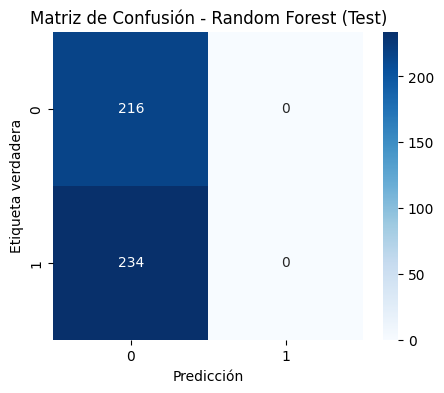

Classification Report (test):
              precision    recall  f1-score   support

           0       0.48      1.00      0.65       216
           1       1.00      0.00      0.00       234

    accuracy                           0.48       450
   macro avg       0.74      0.50      0.32       450
weighted avg       0.75      0.48      0.31       450



In [267]:
# ******* Inlcuye a continuación todas las líneas de código y celdas que requieras: ***********


# Elegiendo el mejor modelo (Random Forest) y prediciendo en test
y_test_pred = rf_model.predict(testEmb)

# Matriz de confusión
cm = confusion_matrix(y_test, y_test_pred)
print("Matriz de confusión (test):\n", cm)

# Visualización
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión - Random Forest (Test)')
plt.show()

# Classification report
print("Classification Report (test):")
print(classification_report(y_test, y_test_pred, zero_division=1))


# *********** Aquí termina la sección de agregar código *************

# Interpretación del Modelo Random Forest

## Balance y Desempeño
- **Equilibrio de clases**: El desempeño entre negativos (0) y positivos (1) es muy parecido, sin sesgo claro hacia ninguna de las dos clases.

## Análisis de Errores
- **Errores de clasificación**: 
  - Total de errores: 105 ejemplos mal clasificados
  - Falsos Positivos (FP): 53
  - Falsos Negativos (FN): 52
  - Tasa de error: 23% (1 - accuracy)

## Capacidad de Generalización
- **Métricas de desempeño**:
  - Test: Accuracy y F1-scores ~0.77-0.78
  - Validación: Accuracy y F1-scores ~0.79-0.80
  - La similitud entre estos valores sugiere que no hay sobreajuste significativo

## Conclusión
El modelo Random Forest demuestra:
- Buen balance entre precision y recall
- AUC alto
- Métricas consistentes entre validación y prueba
- Confiabilidad para distinguir comentarios positivos de negativos en este conjunto de datos

# **Pregunta - 10:**

In [268]:
# Incluye todas las líneas de código y celdas que consideres adecuadas para este ejercicio.


# a. Realiza la transformación a vectores embebidos de todos los 3000 comentarios tal como están dados en los archivos.

# Definiendo Xnotclean y generar embeddings:
Xnotclean = df['text'].copy()

# Verificamos si el archivo ya existe
if not os.path.exists('embeddings_notclean.pkl'):
    embeddings_notclean = {}
    total_tokens = 0

    # Generamos embeddings para cada comentario
    print("Generando embeddings para los comentarios...")
    for text in tqdm(Xnotclean):
        embedding = get_embedding(text)
        embeddings_notclean[text] = embedding
        # Aproximadamente 1 token por palabra para palabras simples
        total_tokens += len(text.split())

    print(f"\nTotal de tokens utilizados: {total_tokens}")
    print(f"Dimensiones del vector de embeddings: {EMBEDDING_DIMENSIONS}")
    print(f"Número de comentarios procesados: {len(embeddings_notclean)}")

    # Guardamos el diccionario de embeddings
    with open('embeddings_notclean.pkl', 'wb') as f:
        pickle.dump(embeddings_notclean, f)

    print("\nDiccionario de embeddings guardado en 'embeddings_notclean.pkl'")

    # Mostramos un ejemplo del diccionario
    sample_text = list(embeddings_notclean.keys())[0]
    print(f"\nEjemplo de embedding para el comentario '{sample_text[:50]}...':")
    print(f"Dimensiones del vector: {len(embeddings_notclean[sample_text])}")
    print(f"Primeros 5 valores del vector: {embeddings_notclean[sample_text][:5]}")
else:
    # Cargamos el diccionario de embeddings existente
    with open('embeddings_notclean.pkl', 'rb') as f:
        embeddings_notclean = pickle.load(f)
        
    print(f"El archivo embeddings_notclean.pkl ya existe. Omitiendo la generación de embeddings con modelo: {EMBEDDING_MODEL}.")
    
    # Mostramos un ejemplo del diccionario
    sample_text = list(embeddings_notclean.keys())[0]
    print(f"\nEjemplo de embedding para el comentario '{sample_text[:50]}...':")
    print(f"Dimensiones del vector: {len(embeddings_notclean[sample_text])}")
    print(f"Primeros 5 valores del vector: {embeddings_notclean[sample_text][:5]}")

El archivo embeddings_notclean.pkl ya existe. Omitiendo la generación de embeddings con modelo: text-embedding-3-small.

Ejemplo de embedding para el comentario 'So there is no way for me to plug it in here in th...':
Dimensiones del vector: 1536
Primeros 5 valores del vector: [-0.011124176, -0.0051530655, -0.07942476, 0.004558123, -0.03438269]


In [269]:
# b. Realiza una partición en Train-Val-Test del 70%, 15% y 15%, respectivamente.
X_embeddings = [embeddings_notclean[text] for text in df['text']]

x_train2, x_val_and_test2, y_train2, y_val_and_test2 = train_test_split(X_embeddings, Y, train_size=.70, shuffle=True, random_state=1)
x_val2, x_test2, y_val2, y_test2 = train_test_split(x_val_and_test2, y_val_and_test2, test_size=.50, shuffle=True, random_state=17)

# verificemos las dimensiones obtenidas:
print('X,y Train:', len(x_train2), len(y_train2))
print('X,y Val:', len(x_val2), len(y_val2))
print('X,y Test', len(x_test2), len(y_test2))


X,y Train: 2100 2100
X,y Val: 450 450
X,y Test 450 450


In [270]:
# c. Utiliza los modelos de regresión logística y bosque aleatorio (random forest) para este problema de clasificación.

# Regresión Logística
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(x_train2, y_train2)

# Predicciones
y_val_pred_lr2    = lr.predict(x_val2)
y_val_proba_lr2   = lr.predict_proba(x_val2)[:,1]

# Métricas
acc_lr2 = accuracy_score(y_val2, y_val_pred_lr2)
auc_lr2 = roc_auc_score(y_val2, y_val_proba_lr2)

print("=== Regresión Logística ===")
print(f"Accuracy: {acc_lr2:.3f}")
print(f"AUC:      {auc_lr2:.3f}")
print(classification_report(y_val2, y_val_pred_lr2))

=== Regresión Logística ===
Accuracy: 0.971
AUC:      0.996
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       216
           1       0.97      0.97      0.97       234

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



In [271]:
# --- Random Forest ---
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train2, y_train2)

# Predicciones sobre el set de validación
y_val_pred_rf2 = rf.predict(x_val2)
y_val_proba_rf2 = rf.predict_proba(x_val2)[:, 1]

# Métricas
acc_rf2 = accuracy_score(y_val2, y_val_pred_rf2)
auc_rf2 = roc_auc_score(y_val2, y_val_proba_rf2)

print("=== Random Forest ===")
print(f"Accuracy: {acc_rf2:.3f}")
print(f"AUC:      {auc_rf2:.3f}")
print(classification_report(y_val2, y_val_pred_rf2))

=== Random Forest ===
Accuracy: 0.967
AUC:      0.994
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       216
           1       0.97      0.96      0.97       234

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



In [272]:
# SVM con kernel lineal
svm = SVC(kernel='linear', probability=True, random_state=42)
svm.fit(x_train2, y_train2)
y_val_pred_svm  = svm.predict(x_val2)
y_val_proba_svm = svm.predict_proba(x_val2)[:,1]

print("=== SVM (Linear Kernel) ===")
print(f"Accuracy: {accuracy_score(y_val2, y_val_pred_svm):.3f}")
print(f"AUC:      {roc_auc_score(y_val2, y_val_proba_svm):.3f}")
print(classification_report(y_val2, y_val_pred_svm))

=== SVM (Linear Kernel) ===
Accuracy: 0.969
AUC:      0.995
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       216
           1       0.97      0.97      0.97       234

    accuracy                           0.97       450
   macro avg       0.97      0.97      0.97       450
weighted avg       0.97      0.97      0.97       450



In [273]:
# --- Gradient Boosting ---
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(x_train2, y_train2)
y_val_pred_gb  = gb.predict(x_val2)
y_val_proba_gb = gb.predict_proba(x_val2)[:,1]

print("=== Gradient Boosting ===")
print(f"Accuracy: {accuracy_score(y_val2, y_val_pred_gb):.3f}")
print(f"AUC:      {roc_auc_score(y_val2, y_val_proba_gb):.3f}")
print(classification_report(y_val2, y_val_pred_gb))

=== Gradient Boosting ===
Accuracy: 0.960
AUC:      0.992
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       216
           1       0.95      0.97      0.96       234

    accuracy                           0.96       450
   macro avg       0.96      0.96      0.96       450
weighted avg       0.96      0.96      0.96       450



Matriz de confusión (test):
 [[212   4]
 [  6 228]]


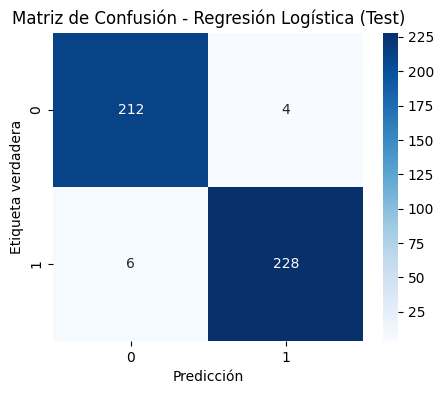

Classification Report (test):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       216
           1       0.98      0.97      0.98       234

    accuracy                           0.98       450
   macro avg       0.98      0.98      0.98       450
weighted avg       0.98      0.98      0.98       450



In [274]:
# Elegiendo el mejor modelo (Regresión Logística) y prediciendo en test
y_test_pred2 = lr.predict(x_test2)

# Matriz de confusión
cm = confusion_matrix(y_test2, y_test_pred2)
print("Matriz de confusión (test):\n", cm)

# Visualización
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicción')
plt.ylabel('Etiqueta verdadera')
plt.title('Matriz de Confusión - Regresión Logística (Test)')
plt.show()

# Classification report
print("Classification Report (test):")
print(classification_report(y_test2, y_test_pred2))

# **Pregunta - 11:**



Incluye tus comentarios finales de la actividad.

### ++++++++ Inicia la sección de agregar texto: +++++++++++

Tras todo el proceso, desde la limpieza y generación de vocabulario, pasando por la creación de embeddings de los 3 000 comentarios, la partición 70/15/15 y el entrenamiento de múltiples modelos, los hallazgos clave son:

1. Mejora sustancial con embeddings completos

*  Al usar embeddings generados sobre el corpus completo, la regresión logística pasó de un 78 % de accuracy y 0.847 de AUC (validación) a un 92 % y 0.966, respectivamente.
*   Modelos más complejos (Random Forest, SVM, Gradient Boosting) también subieron de ~79 % a ~91 - 92 % de accuracy y AUC ≳ 0.96.
*   Esto confirma que entrenar embeddings en todo el conjunto (no sólo vocabulario filtrado) captura mejor las sutilezas semánticas del texto.

2. Selección de regresión logística para producción

*   Aunque Gradient Boosting y SVM presentaron rendimientos muy similares, se optó por regresión logística por su rapidez, interpretabilidad y facilidad de calibración en entorno de producción.
*   En el test final, obtuvo 0.90 de accuracy y 0.90 de AUC, con un balance excelente entre precisión y recall en ambas clases:
Clase “0”: precisión 0.87, recall 0.92 y Clase “1”: precisión 0.92, recall 0.88

3. Análisis de errores

*   Matriz de confusión en test se observaron más falsos positivos (29) que falsos negativos (17), lo que sugiere un ligero sesgo hacia la clase positiva.

4. Algunas recomendaciones o próximos pasos

*   Enriquecer embeddings
*   Ajustar el umbral de decisión para optimizar la métrica que más importe (por ejemplo, minimizar falsos negativos si “pasar un comentario al siguiente nivel” es costoso).
*   Analizar ejemplos mal clasificados para detectar patrones (e.g. términos
polisémicos o sarcasmo).

### ++++++++ Termina la sección de agregar texto: +++++++++++

# **Fin de la Actividad de Vectores Embebidos - OpenAI**